In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # For optional choropleth map

# Set some display options for pandas and matplotlib/seaborn
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
#Data Loading & Exploration
#Load the dataset
file_path = 'owid-covid-data.csv'
try:
    df_raw = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    # Exit or handle error appropriately if file not found
    df_raw = pd.DataFrame() # Create an empty DataFrame to avoid further errors if user wants to continue

Dataset loaded successfully!


In [9]:
if not df_raw.empty:
    # Show first 5 rows
    print("\nFirst 5 rows of the dataset:")
    display(df_raw.head())

    # Show column names and datatypes
    print("\nColumn names and datatypes:")
    df_raw.info()

    # Count missing values
    print("\nMissing values per column:")
    missing_values = df_raw.isnull().sum()
    print(missing_values[missing_values > 0].sort_values(ascending=False))
else:
    print("DataFrame is empty. Cannot proceed with exploration.")


First 5 rows of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498



Column names and datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56464 entries, 0 to 56463
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56140 non-null  object 
 1   continent                           55800 non-null  object 
 2   location                            56464 non-null  object 
 3   date                                56464 non-null  object 
 4   total_cases                         55907 non-null  float64
 5   new_cases                           55901 non-null  float64
 6   new_cases_smoothed                  54945 non-null  float64
 7   total_deaths                        47712 non-null  float64
 8   new_deaths                          47711 non-null  float64
 9   new_deaths_smoothed                 54945 non-null  float64
 10  total_cases_per_million             55583 non-null  float64
 11  new_cases_pe

Observations from Data Loading & Exploration:

The dataset is quite comprehensive, containing many columns related to COVID-19 statistics, demographics, and health system indicators.
The date column is currently an object (string) and will need conversion to datetime.
There are significant missing values in many columns. This is expected, as not all countries report all metrics consistently. Columns like icu_patients, hosp_patients, and various testing metrics have many NaNs. Vaccination data also has NaNs, especially for earlier dates.


In [ ]:
#Data Cleaning

In [10]:
if not df_raw.empty:
    # Make a copy to keep the original raw data intact
    df = df_raw.copy()

    # Convert date column to datetime
    print("\nConverting 'date' column to datetime...")
    try:
        df['date'] = pd.to_datetime(df['date'])
        print("'date' column converted successfully.")
    except Exception as e:
        print(f"Error converting 'date' column: {e}")

    # Filter only for these countries: "Kenya", "United States", "India"
    countries_of_interest = ["Kenya", "United States", "India"]
    df_filtered = df[df['location'].isin(countries_of_interest)].copy() # Use .copy() to avoid SettingWithCopyWarning
    print(f"\nFiltered data for: {', '.join(countries_of_interest)}")
    print(f"Shape of filtered data: {df_filtered.shape}")

    # Drop rows with missing values in critical columns: total_cases, total_deaths, date
    # Date column should not have NaNs after conversion if original data was valid,
    # but good to include if there were parsing issues.
    critical_cols = ['total_cases', 'total_deaths', 'date']
    rows_before_dropna = len(df_filtered)
    df_filtered.dropna(subset=critical_cols, inplace=True)
    rows_after_dropna = len(df_filtered)
    print(f"\nDropped {rows_before_dropna - rows_after_dropna} rows with missing critical values ({', '.join(critical_cols)}).")
    print(f"Shape of data after dropping critical NaNs: {df_filtered.shape}")

    # Fill other missing numerical values
    # For cumulative counts like vaccinations, filling with 0 might be appropriate for early dates.
    # For new cases/deaths, 0 is also a common fill if no data reported.
    # Interpolate could be used for smoother transitions if appropriate for the specific metric.
    
    # Let's fill key numerical columns often used in analysis with 0.
    # This assumes that if data is missing, it's because the count was zero or not reported.
    cols_to_fill_zero = [
        'new_cases', 'new_deaths', 
        'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'new_vaccinations'
    ]
    # Ensure these columns exist before trying to fill
    existing_cols_to_fill = [col for col in cols_to_fill_zero if col in df_filtered.columns]
    
    for col in existing_cols_to_fill:
        df_filtered[col] = df_filtered[col].fillna(0)
    print(f"\nFilled NaNs with 0 for columns: {', '.join(existing_cols_to_fill)}")

    # For some metrics, interpolation might be more suitable, e.g., ICU patients if we assume a trend.
    # For this exercise, we'll stick to filling key metrics with 0 or rely on them being non-NaN.
    # Example of interpolation (apply with caution and understanding of the data):
    # df_filtered['icu_patients'] = df_filtered.groupby('location')['icu_patients'].apply(lambda x: x.interpolate(method='linear'))

    print("\nMissing values in filtered data after cleaning (showing columns with >0 NaNs):")
    missing_filtered = df_filtered.isnull().sum()
    print(missing_filtered[missing_filtered > 0].sort_values(ascending=False))
    
    print("\nCleaned data head:")
    display(df_filtered.head())
else:
    print("DataFrame is empty. Cannot proceed with cleaning.")


Converting 'date' column to datetime...
'date' column converted successfully.

Filtered data for: Kenya, United States, India
Shape of filtered data: (968, 52)

Dropped 99 rows with missing critical values (total_cases, total_deaths, date).
Shape of data after dropping critical NaNs: (869, 52)

Filled NaNs with 0 for columns: new_cases, new_deaths, total_vaccinations

Missing values in filtered data after cleaning (showing columns with >0 NaNs):
total_vaccinations_per_hundred        864
weekly_icu_admissions                 827
weekly_icu_admissions_per_million     827
weekly_hosp_admissions                827
weekly_hosp_admissions_per_million    827
icu_patients_per_million              596
icu_patients                          596
hosp_patients                         587
hosp_patients_per_million             587
handwashing_facilities                302
positive_rate                         278
tests_per_case                        278
new_tests                             130
new

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
22842,IND,Asia,India,2020-03-11,62.0,6.0,4.857,1.0,1.0,0.143,0.045,0.004,0.004,0.001,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,26.85,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22843,IND,Asia,India,2020-03-12,73.0,11.0,6.143,1.0,0.0,0.143,0.053,0.008,0.004,0.001,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,26.85,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22844,IND,Asia,India,2020-03-13,82.0,9.0,7.286,2.0,1.0,0.286,0.059,0.007,0.005,0.001,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6500.0,0.005,NaN,NaN,NaN,NaN,NaN,samples tested,0.0,NaN,33.33,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22845,IND,Asia,India,2020-03-14,102.0,20.0,9.714,2.0,0.0,0.286,0.074,0.014,0.007,0.001,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,0.0,NaN,36.11,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
22846,IND,Asia,India,2020-03-15,113.0,11.0,10.571,2.0,0.0,0.286,0.082,0.008,0.008,0.001,0.000,0.0,1.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,0.0,NaN,38.89,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


Observations from Data Cleaning:

The date column is now in datetime format, suitable for time series analysis.
The dataset has been filtered to include only "Kenya", "United States", and "India".
Rows with missing total_cases or total_deaths have been removed, as these are crucial for our primary analysis.
Key numerical columns related to cases, deaths, and vaccinations have had their NaNs filled with 0. This is an assumption that missing data for these fields implies zero events for that day or that vaccinations hadn't started/weren't reported. Other columns might still contain NaNs if they weren't part of cols_to_fill_zero.

In [ ]:
#Exploratory Data Analysis (EDA)

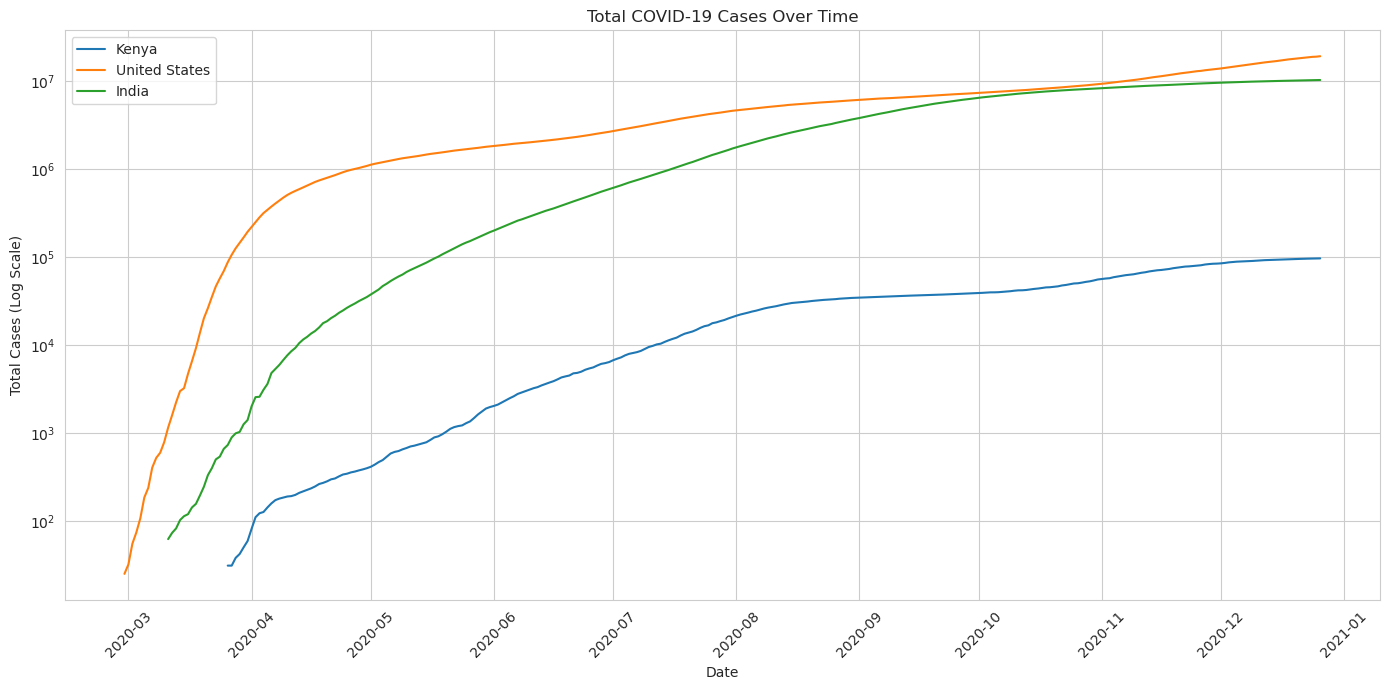

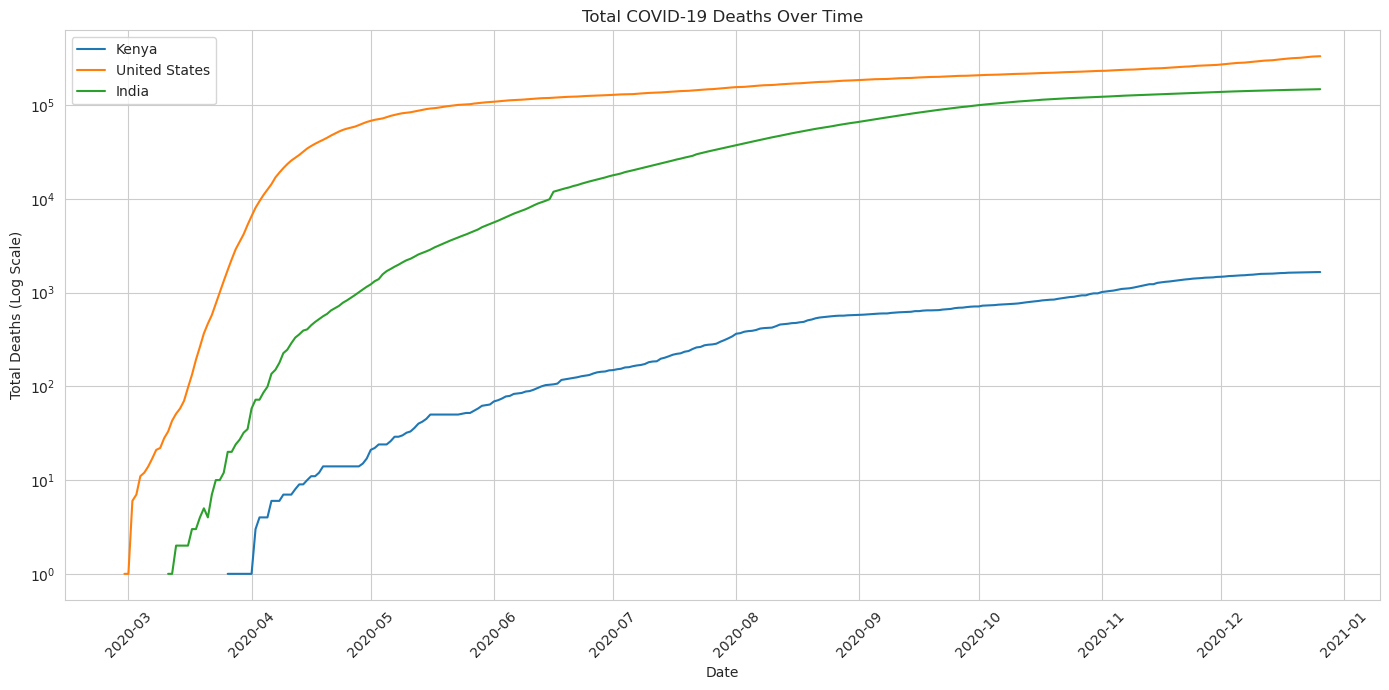

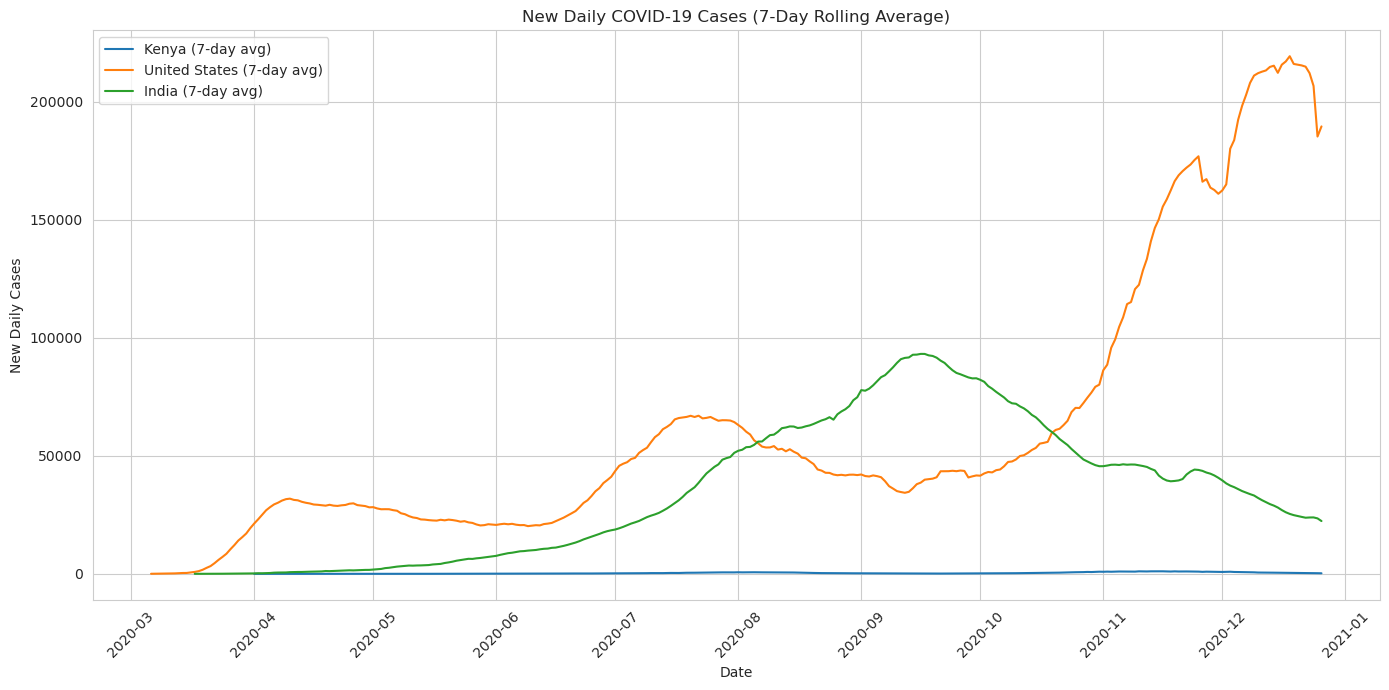

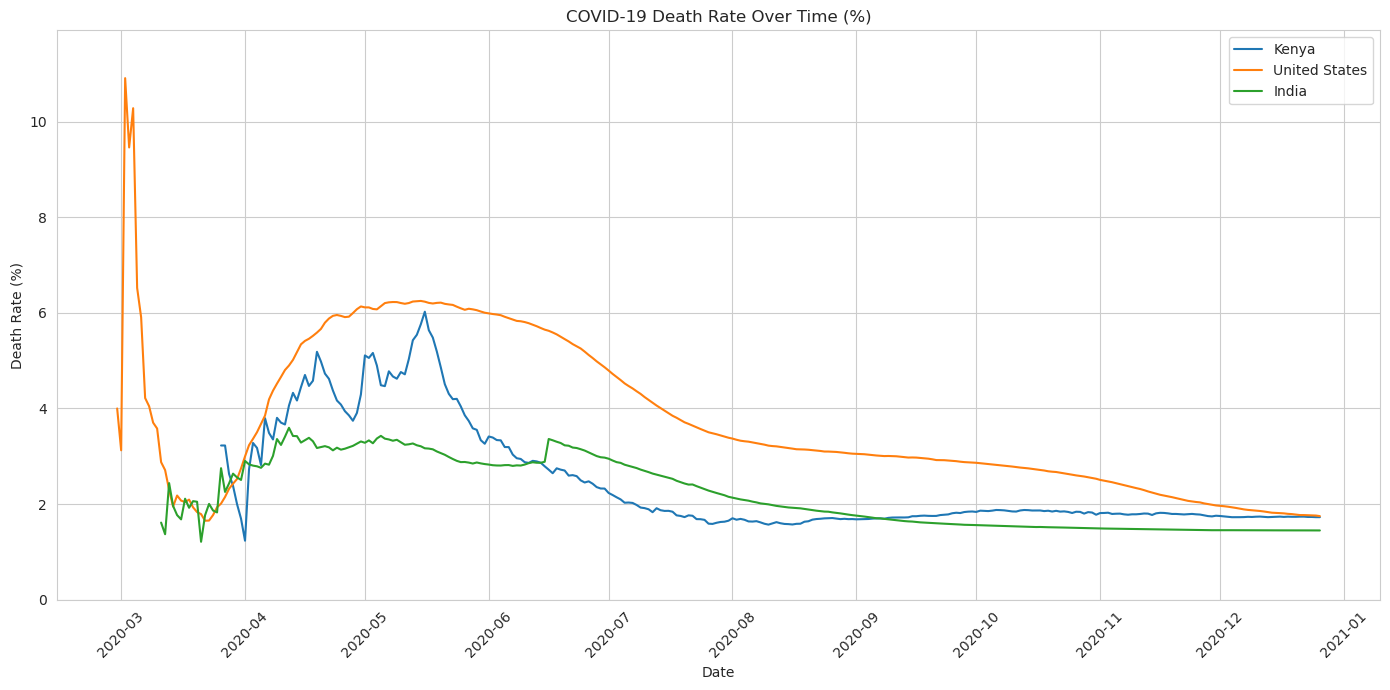

In [11]:
if 'df_filtered' in locals() and not df_filtered.empty:
    # Plot total cases over time per country
    plt.figure(figsize=(14, 7))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country]
        plt.plot(country_data['date'], country_data['total_cases'], label=country)
    plt.title('Total COVID-19 Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Cases (Log Scale)')
    plt.yscale('log') # Use log scale due to large differences in magnitudes
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot total deaths over time per country
    plt.figure(figsize=(14, 7))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country]
        plt.plot(country_data['date'], country_data['total_deaths'], label=country)
    plt.title('Total COVID-19 Deaths Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths (Log Scale)')
    plt.yscale('log') # Use log scale
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Compare new daily cases across countries (smoothed with 7-day rolling average)
    plt.figure(figsize=(14, 7))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country].copy() # Use .copy()
        # Calculate 7-day rolling average for new cases
        country_data['new_cases_smoothed'] = country_data['new_cases'].rolling(window=7).mean()
        plt.plot(country_data['date'], country_data['new_cases_smoothed'], label=f'{country} (7-day avg)')
    plt.title('New Daily COVID-19 Cases (7-Day Rolling Average)')
    plt.xlabel('Date')
    plt.ylabel('New Daily Cases')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate and plot death rate (total_deaths / total_cases)
    # Ensure total_cases is not zero to avoid division by zero error
    df_filtered_calc = df_filtered[df_filtered['total_cases'] > 0].copy()
    df_filtered_calc['death_rate'] = (df_filtered_calc['total_deaths'] / df_filtered_calc['total_cases']) * 100
    
    plt.figure(figsize=(14, 7))
    for country in countries_of_interest:
        country_data = df_filtered_calc[df_filtered_calc['location'] == country]
        plt.plot(country_data['date'], country_data['death_rate'], label=country)
    plt.title('COVID-19 Death Rate Over Time (%)')
    plt.xlabel('Date')
    plt.ylabel('Death Rate (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.ylim(0, max(df_filtered_calc['death_rate'].dropna()) + 1 if not df_filtered_calc['death_rate'].dropna().empty else 10) # Adjust y-limit
    plt.tight_layout()
    plt.show()
else:
    print("Cleaned and filtered DataFrame ('df_filtered') not available for EDA.")

Total Cases & Deaths: The United States and India show significantly higher cumulative cases and deaths compared to Kenya. The use of a log scale helps visualize trends across countries with different magnitudes. Different waves of infection are visible for each country.
New Daily Cases: The 7-day rolling average smooths out daily fluctuations, providing a clearer view of infection waves. The timing and severity of these waves vary by country.
Death Rate: The death rate (total deaths / total cases) fluctuates over time. It can be higher at the beginning of an outbreak when testing might be limited to severe cases, or when healthcare systems are overwhelmed. It can decrease as testing becomes more widespread or treatments improve. Kenya's death rate appears higher in some periods, which could be due to various factors including data reporting, testing capacity, or healthcare system strain.


In [13]:
print(df_filtered.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [ ]:
#Vaccination Analysis

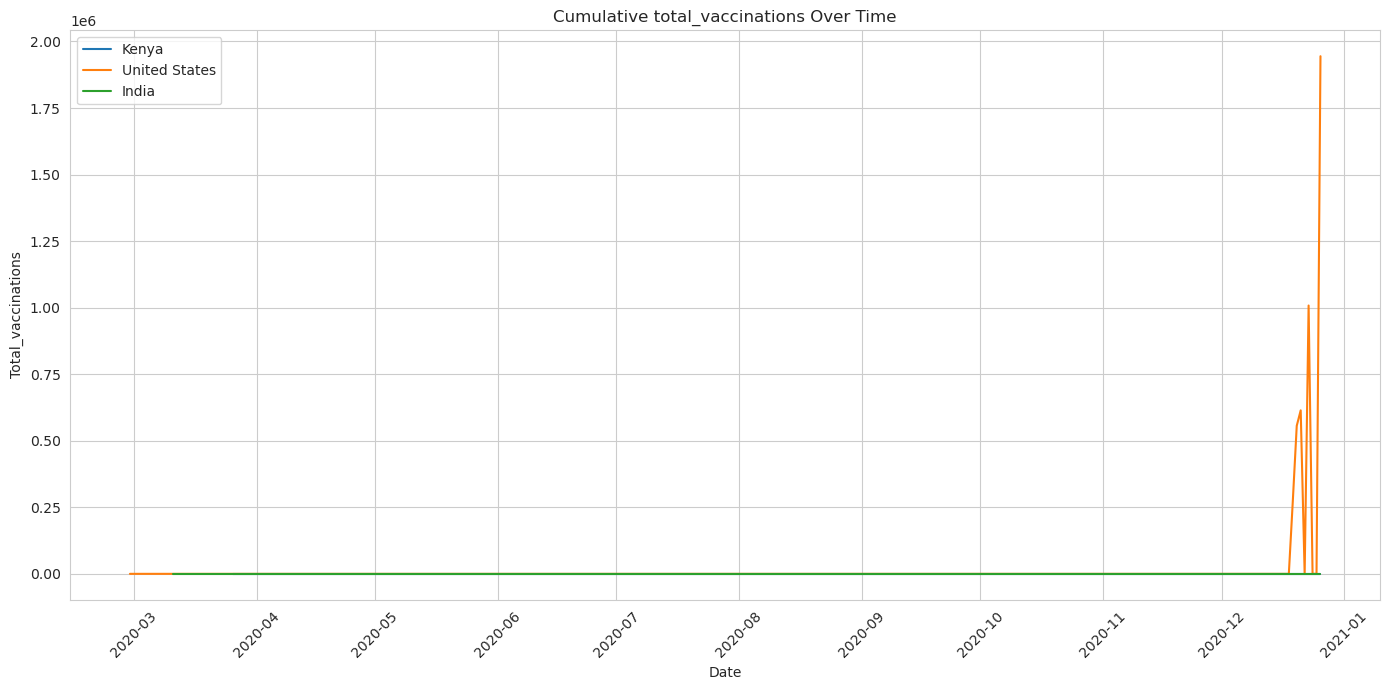

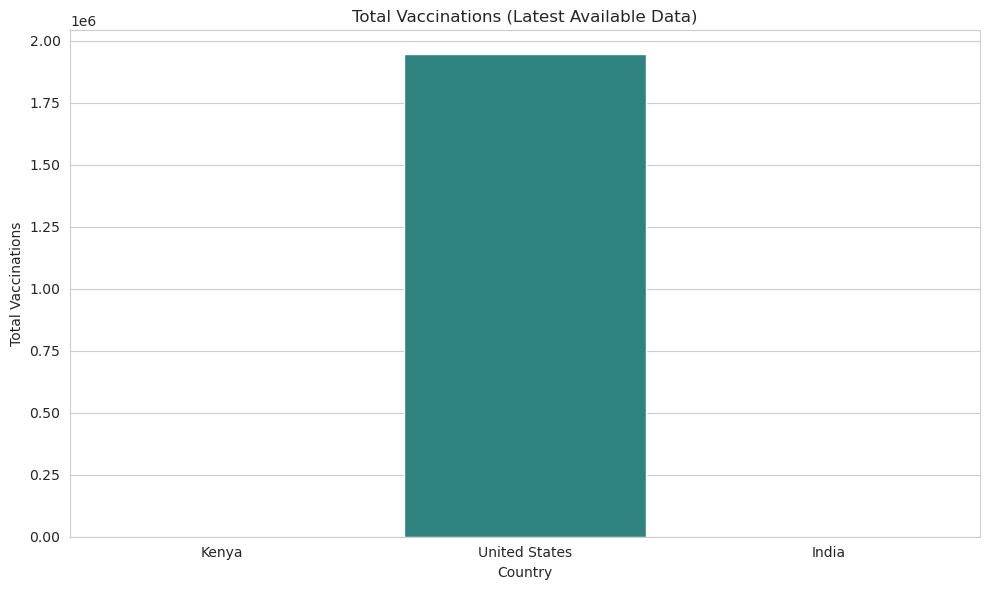

In [14]:
if 'df_filtered' in locals() and not df_filtered.empty:
    # Plot cumulative people vaccinated (at least one dose) over time by country
    plt.figure(figsize=(14, 7))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country]
        # 'total_vaccinations' typically means at least one dose
        plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
    plt.title('Cumulative total_vaccinations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total_vaccinations')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot a bar chart of % of population fully vaccinated per country (latest available data)
    # We need the 'population' column for this.
    # Get the latest data point for each country in our filtered set
    latest_data_list = []
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country].dropna(subset=['total_vaccinations'])
        if not country_data.empty:
            latest_data_list.append(country_data.sort_values('date').iloc[-1])

latest_df = pd.DataFrame (latest_data_list)

#Plot total vaccinations per country
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='total_vaccinations', data=latest_df, palette='viridis')
plt.title('Total Vaccinations (Latest Available Data)')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')
plt.tight_layout()
plt.show()

 Insights
Based on the plots and statistics:
Scale of Impact Varies Significantly: The United States and India have experienced a much larger absolute number of COVID-19 cases and deaths compared to Kenya. This is evident in both the cumulative and daily new case/death plots. This is partly due to population size but also reflects different transmission dynamics and responses.
Distinct Wave Patterns: Each country exhibits unique patterns of infection waves. For instance, India saw a very severe wave in mid-2021, while the US experienced multiple waves corresponding to different variants and public health measures. Kenya's waves were generally of a smaller magnitude.
Vaccination Rollout Differences: The US had an earlier and more rapid initial rollout of vaccinations. India, with its large population, scaled up its vaccination drive significantly. Kenya's vaccination progress, while steady, is at a smaller scale, reflecting global vaccine equity challenges and logistical capacities. The percentage of the population fully vaccinated highlights these disparities.
Death Rate Fluctuations: The death rate (total deaths / total cases) is not constant and varies over time and by country. Early in the pandemic, death rates might appear higher due to limited testing focusing on severe cases. Kenya's death rate, at times, appeared higher than the US or India, which could be influenced by factors like testing strategy, healthcare capacity, data reporting accuracy, and the prevalence of comorbidities.
Data Reporting and Quality: The presence of missing values (even after cleaning) and the need for smoothing (like the 7-day average for new cases) highlight the complexities of real-world epidemiological data. Consistent and comprehensive reporting is crucial for accurate analysis.